In [23]:
import pandas as pd
import requests, json, csv, os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#from https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [3]:
def csv_creator(filename, header, data):
    with open(filename, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)
        for num in range(int(len(total_stats) / 19)):
            info = next(data)
            writer.writerow(info)

In [4]:
def concat(df1, df2):
    frames = [df1, df2]
    return pd.concat(frames, ignore_index=True)

In [5]:
for year in range(1956,2021):
    req = requests.get("https://www.basketball-reference.com/awards/awards_" + str(year) + ".html")
    req.raise_for_status()
    soup = BeautifulSoup(req.text)
    table = soup.find(id="mvp")
    stats = list()
    total_stats = list()
    try:
        for row in table.find_all("td"):
            stats.append(row.get("data-stat"))
            total_stats.append(row.text)
        headers = stats[:19]
        data = chunks(total_stats, 19)
        csv_creator(os.path.join("Data", str(year) + ".csv"), headers, data)
    except:
        continue

In [6]:
mvp = pd.read_csv("Data/mvp.csv")
current_pg = pd.read_csv("Data/pergame.csv")
current_adv = pd.read_csv("Data/advanced.csv")
current_pg = current_pg.drop(["Pos","GS","FG", "FGA", "ORB", "DRB", "3P", "3PA", "2P", "2PA", "2P%", "FT", "FTA", "TOV", "PF", "eFG%"], axis=1)
current_adv = current_adv.drop(["Rk", "Pos", "age", "Team", "g", "MP", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TOV%", "TRB%", "AST%", "STL%", "BLK%", "OBPM", "DBPM", "BPM", "VORP"], axis=1)
all_curr_data = pd.merge(left=current_pg, right=current_adv, left_on="player", right_on="player")



In [7]:
concat_df = pd.read_csv("Data/1956.csv")
for year in range(1957,2021):
    try:
        df = pd.read_csv(os.path.join("Data", str(year) + ".csv"))
        concat_df = concat(concat_df, df)
    except:
        continue

In [8]:
concat_df = concat_df.fillna(0)

In [9]:
model = Pipeline([
    ("std", StandardScaler()),
    ("lr", LinearRegression())
])
model.fit(concat_df[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], concat_df["award_share"])


Pipeline(steps=[('std', StandardScaler()), ('lr', LinearRegression())])

In [10]:
test = pd.read_csv("Data/2020.csv")

In [11]:
test["predicted_share"] = model.predict(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])

In [12]:
test

,player,age,team_id,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,predicted_share
0,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,0.377990
1,LeBron James,35,LAL,16.0,753.0,1010,0.746,67,34.6,25.3,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204,0.256741
2,James Harden,30,HOU,0.0,367.0,1010,0.363,68,36.5,34.3,6.6,7.5,1.8,0.9,0.444,0.355,0.865,13.1,0.254,0.385493
3,Luka Dončić,20,DAL,0.0,200.0,1010,0.198,61,33.6,28.8,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207,0.248246
4,Kawhi Leonard,28,LAC,0.0,168.0,1010,0.166,57,32.4,27.1,7.1,4.9,1.8,0.6,0.470,0.378,0.886,8.7,0.226,0.185971
5,Anthony Davis,26,LAL,0.0,82.0,1010,0.081,62,34.4,26.1,9.3,3.2,1.5,2.3,0.503,0.330,0.846,11.1,0.250,0.274515
6,Chris Paul,34,OKC,0.0,26.0,1010,0.026,70,31.5,17.6,5.0,6.7,1.6,0.2,0.489,0.365,0.907,8.9,0.193,0.093993
7,Damian Lillard,29,POR,0.0,23.0,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,0.463,0.401,0.888,11.6,0.225,0.273755
8,Nikola Jokić,24,DEN,0.0,18.0,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,0.528,0.314,0.817,9.8,0.202,0.185000
9,Pascal Siakam,25,TOR,0.0,17.0,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,0.453,0.359,0.792,5.4,0.123,-0.040306


In [13]:
model.score(test[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]], test["award_share"])

0.34040509996952517

In [14]:
all_curr_data["predicted_share"] = model.predict(all_curr_data[["pts_per_g", "trb_per_g", "ast_per_g", "stl_per_g", "blk_per_g", "ws", "ws_per_48"]])
all_curr_data

,Rk,player,age,Team,g,mp_per_g,fg_pct,fg3_pct,ft_pct,trb_per_g,...,stl_per_g,blk_per_g,pts_per_g,PER,USG%,OWS,DWS,ws,ws_per_48,predicted_share
0,1,Stephen Curry,32,GSW,56,34.0,0.486,0.426,0.916,5.5,...,1.2,0.1,31.3,26.1,34.0,5.8,2.1,7.9,0.199,0.155845
1,2,Bradley Beal,27,WAS,55,35.5,0.484,0.347,0.901,4.7,...,1.2,0.3,31.0,22.9,34.3,3.9,1.5,5.5,0.134,0.008915
2,3,Luka Dončić,21,DAL,57,35.2,0.486,0.356,0.725,8.0,...,1.0,0.6,28.6,26.0,35.8,5.0,2.3,7.4,0.176,0.183562
3,4,Damian Lillard,30,POR,58,35.8,0.435,0.378,0.926,4.2,...,0.9,0.3,28.3,24.5,31.7,7.5,0.6,8.1,0.187,0.147228
4,5,Giannis Antetokounmpo,26,MIL,53,33.0,0.568,0.305,0.684,11.2,...,1.2,1.2,28.0,29.1,32.6,5.8,3.1,8.9,0.244,0.278142
5,6,Zach LaVine,25,CHI,53,35.2,0.506,0.416,0.848,5.1,...,0.8,0.5,27.5,21.6,31.2,3.6,1.6,5.2,0.133,-0.002478
6,7,Zion Williamson,20,NOP,59,33.1,0.616,0.313,0.694,7.1,...,0.9,0.6,27.0,27.4,29.8,7.2,1.4,8.6,0.212,0.145060
7,8,Kyrie Irving,28,BRK,47,35.2,0.502,0.384,0.924,4.9,...,1.3,0.6,26.9,24.2,30.5,5.1,1.3,6.4,0.185,0.099679
8,9,Donovan Mitchell,24,UTA,53,33.4,0.438,0.386,0.845,4.4,...,1.0,0.3,26.4,21.3,33.6,4.0,2.2,6.2,0.167,0.041992
9,10,Jayson Tatum,22,BOS,57,35.9,0.458,0.388,0.870,7.5,...,1.2,0.4,26.4,21.3,30.7,3.8,2.2,6.0,0.140,0.019126


In [15]:
percent_vote = list()
for season in mvp["Season"]:
    try:
        df = pd.read_csv(os.path.join("Data", str(season) + ".csv"))
        percent_vote.append(df["award_share"][0])
    except:
        percent_vote.append("NaN")
mvp["award_share"] = percent_vote

In [16]:
mvp[["Season", "Player", "PTS", "WS", "award_share"]]

,Season,Player,PTS,WS,award_share
0,2020,Giannis Antetokounmpo,29.5,11.1,0.952
1,2019,Giannis Antetokounmpo,27.7,14.4,0.932
2,2018,James Harden,30.4,15.4,0.955
3,2017,Russell Westbrook,31.6,13.1,0.879
4,2016,Stephen Curry,30.1,17.9,1
...,...,...,...,...,...
60,1960,Wilt Chamberlain,37.6,17.0,0.684
61,1959,Bob Pettit,29.2,14.8,0.773
62,1958,Bill Russell,16.6,11.3,0.57
63,1957,Bob Cousy,20.6,8.8,0.288


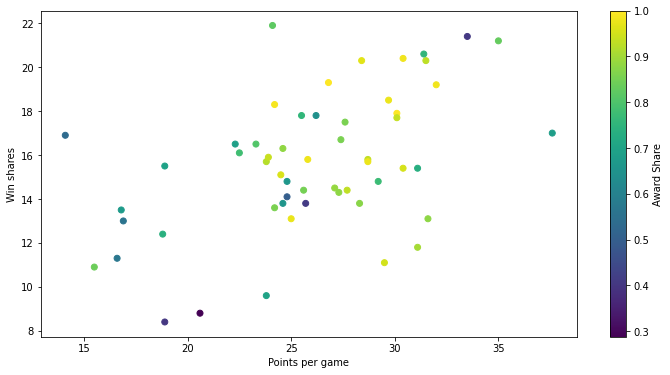

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(mvp["PTS"], mvp["WS"], c=mvp["award_share"])
#describes how convincingly each mvp won the award, right and up suggests better score
plt.xlabel("Points per game")
plt.ylabel("Win shares")
plt.colorbar(label="Award Share")

<AxesSubplot:title={'center':'Figure 2b: Linear Regression Coefficients'}, xlabel='Feature', ylabel='Coefficient'>

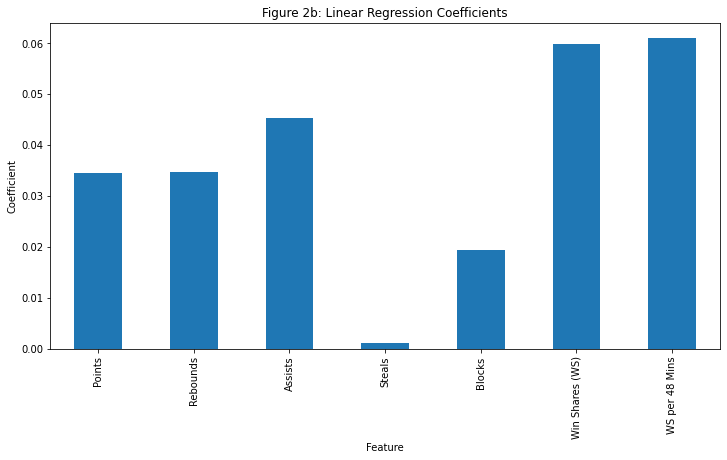

In [38]:
fig, ax = plt.subplots(figsize=(12,6))
coef = model["lr"].coef_
keys = ["Points", "Rebounds", "Assists", "Steals", "Blocks", "Win Shares (WS)", "WS per 48 Mins"]
series = pd.Series(coef, keys)
series.plot.bar(xlabel="Feature", ylabel="Coefficient", title="Figure 2b: Linear Regression Coefficients")

<AxesSubplot:title={'center':'Figure 2a: Predicted MVP Award Shares 2021 Season'}, xlabel='Player', ylabel='Award Shares'>

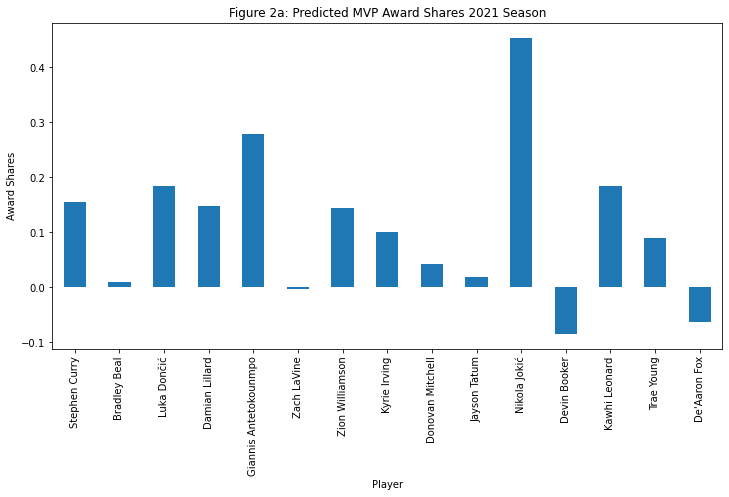

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
award_shares = all_curr_data["predicted_share"].values
names = all_curr_data["player"]
series = pd.Series(award_shares, names)
series.plot.bar(xlabel="Player", ylabel="Award Shares", title="Figure 2a: Predicted MVP Award Shares 2021 Season")